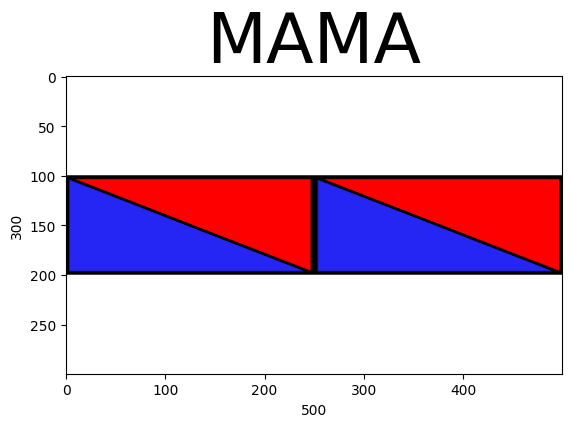

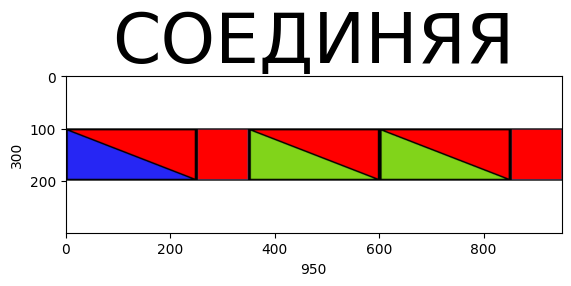

In [ ]:
from utils.utils import has_cyrillic, get_word_scheme, vis_image_scheme

while True:
    word = input("Введи слово на русском языке (для выхода введи Q или Й) ")
    if word == 'Q' or word == 'Й' or word == 'й' or word == 'q':
        break
    if word.isalpha() == False or has_cyrillic(word) == False:
        print(f'Слово должно состоять только из русских букв, попробуй еще раз')
    else:
        img = get_word_scheme(word.upper())
        # print(img)
        result = vis_image_scheme(word=word, image=img)

In [3]:
!python3 word_to_scheme.py

Введи слово на русском языке (для выхода введи Q или Й) Traceback (most recent call last):
  File "/workspaces/word-scheme/word_to_scheme.py", line 4, in <module>
    word = input("Введи слово на русском языке (для выхода введи Q или Й) ")
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt
^C
